## Step 1: Load Articles into a DataFrame

In this step, we will load all published articles associated with our Dev.to account into a Pandas DataFrame. This data will allow us to examine the article titles and publication dates.

The `load_articles_to_dataframe` function fetches articles from the Dev.to API, handles pagination, and organizes the results in a DataFrame for easy analysis.


In [2]:
import os
import src.api_client as api_client
import pandas as pd

# Check if the articles file exists
if os.path.exists("articles.parquet"):
    # Load articles from the existing Parquet file
    articles_df = pd.read_parquet("articles.parquet")
    print("Loaded articles from articles.parquet")
else:
    # Fetch articles and save to Parquet file
    articles_df = api_client.load_articles_to_dataframe()
    articles_df.to_parquet("articles.parquet", compression='gzip')
    print("Fetched articles from API and saved to articles.parquet")

articles_df.head(10)

Loaded articles from articles.parquet


,title,created_at,public_reactions_count
0,12 Steps to Organize and Maintain Your Python ...,2024-10-30T16:16:25.202Z,6
1,Data Analytics Dashboard Starter Kit with Neon...,2024-08-31T11:22:21.164Z,23
2,Binary Tree,2024-06-16T10:24:55.823Z,9
3,My Journey Learning AI for Songwriting: LSTMs ...,2024-02-19T13:47:52.939Z,17
4,The Data Engineering Docker-Compose Starter Kit,2023-09-22T09:38:28.956Z,13
5,The Golang Saga: A Coder’s Journey There and B...,2023-08-16T17:06:20.082Z,7
6,The Golang Saga: A Coder’s Journey There and B...,2023-07-27T16:19:13.884Z,7
7,The Golang Saga: A Coder’s Journey There and B...,2023-07-04T19:27:11.200Z,22
8,Unleash Your Pipeline Creativity: Local Develo...,2023-05-03T07:52:12.468Z,5
9,From Kafka to Amazon S3: Partitioning Outputs,2023-04-09T16:03:41.325Z,7


## Step 2: Load Followers into a DataFrame

Next, we’ll load the details of all followers into a Pandas DataFrame. This data provides insights into each follower’s profile, which we can later analyze to assess follower engagement and activity levels.

The `load_followers_to_dataframe` function collects data on each follower, including profile information.


In [3]:
# Check if the followers file exists
if os.path.exists("followers.parquet"):
    # Load followers from the existing Parquet file
    followers_df = pd.read_parquet("followers.parquet")
    print("Loaded followers from followers.parquet")
else:
    # Fetch followers and save to Parquet file
    followers_df = api_client.load_extended_followers_to_dataframe()
    followers_df.to_parquet("followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to followers.parquet")

followers_df.head(10)

Loaded followers from followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,summary,location,website_url,joined_at
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,Development,None,None,"Oct 31, 2024"
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Aug 31, 2024"


In [4]:
print(f"You have {len(articles_df)} articles and {len(followers_df)} followers.")

You have 11 articles and 2485 followers.


## Step 3: Enrich Followers Data with Article Information

In this step, we expand our analysis by adding article information for each follower. Using the `update_followers_with_articles` function, we retrieve:

- The total number of articles each follower has published (`article_count`).
- A list of article titles for each follower (`article_titles`).
- A unique list of tags across all articles by each follower (`unique_tags`).

This enriched data will allow us to better understand follower engagement and interests based on their content.

In [5]:
if os.path.exists("extended_followers.parquet"):
    # Load followers from the existing Parquet file
    extended_followers_df = pd.read_parquet("extended_followers.parquet")
    print("Loaded followers from extended_followers.parquet")
else:
    # Enrich followers with article information
    extended_followers_df = api_client.update_followers_with_articles(followers_df)
    extended_followers_df.to_parquet("extended_followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to extended_followers.parquet")

extended_followers_df.head(10)

Loaded followers from extended_followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,summary,location,website_url,joined_at,article_count,article_titles,unique_tags
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,Development,None,None,"Oct 31, 2024",0,[],[]
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[]
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[]
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[]
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[]
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[]
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[]
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[]
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[]
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Aug 31, 2024",0,[],[]


## Step 4: Enrich Followers Data with Profile Data from Dev.to

In this step, we enhance our follower dataset by including additional profile data scraped from Dev.to:

- **Badges**: List of badges each follower has earned.
- **Comments Count**: Total number of comments written by each follower.
- **Tags Followed**: Number of tags each follower is following.

In [6]:
if os.path.exists("extended_scrapped_followers.parquet"):
    extended_scrapped_followers_df = pd.read_parquet("extended_scrapped_followers.parquet")
    print("Loaded followers from extended_followers.parquet")
else:
    extended_scrapped_followers_df = api_client.update_followers_with_stats(extended_followers_df)
    extended_scrapped_followers_df.to_parquet("extended_scrapped_followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to extended_followers.parquet")

extended_scrapped_followers_df.head(10)

Loaded followers from extended_followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,...,location,website_url,joined_at,article_count,article_titles,unique_tags,badges,badge_descriptions,comments_count,tags_count
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,...,None,None,"Oct 31, 2024",0,[],[],[],[],0,0
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,None,None,"Oct 31, 2024",0,[],[],[],[],0,0
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,None,None,"Oct 31, 2024",0,[],[],[],[],0,0
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,None,None,"Oct 31, 2024",0,[],[],[],[],0,2
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,None,None,"Oct 31, 2024",0,[],[],[],[],0,0
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,None,None,"Oct 31, 2024",0,[],[],[],[],0,3
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,None,None,"Oct 31, 2024",0,[],[],[],[],0,2
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,None,None,"Oct 31, 2024",0,[],[],[],[],0,0
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,None,None,"Oct 31, 2024",0,[],[],[],[],0,0
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,None,None,"Aug 31, 2024",0,[],[],[],[],0,2


In [7]:
extended_scrapped_followers_df.columns

Index(['type_of', 'id', 'created_at', 'user_id', 'name', 'path', 'username',
       'profile_image', 'twitter_username', 'github_username', 'summary',
       'location', 'website_url', 'joined_at', 'article_count',
       'article_titles', 'unique_tags', 'badges', 'badge_descriptions',
       'comments_count', 'tags_count'],
      dtype='object')

### Follower Growth Analysis: Impact of Articles on New Followers

This bar plot highlights how many followers were gained within three days after each article was published, with a final bar showing followers who joined outside any article-related window. This breakdown will make it easy to see which articles had the most impact on follower growth.



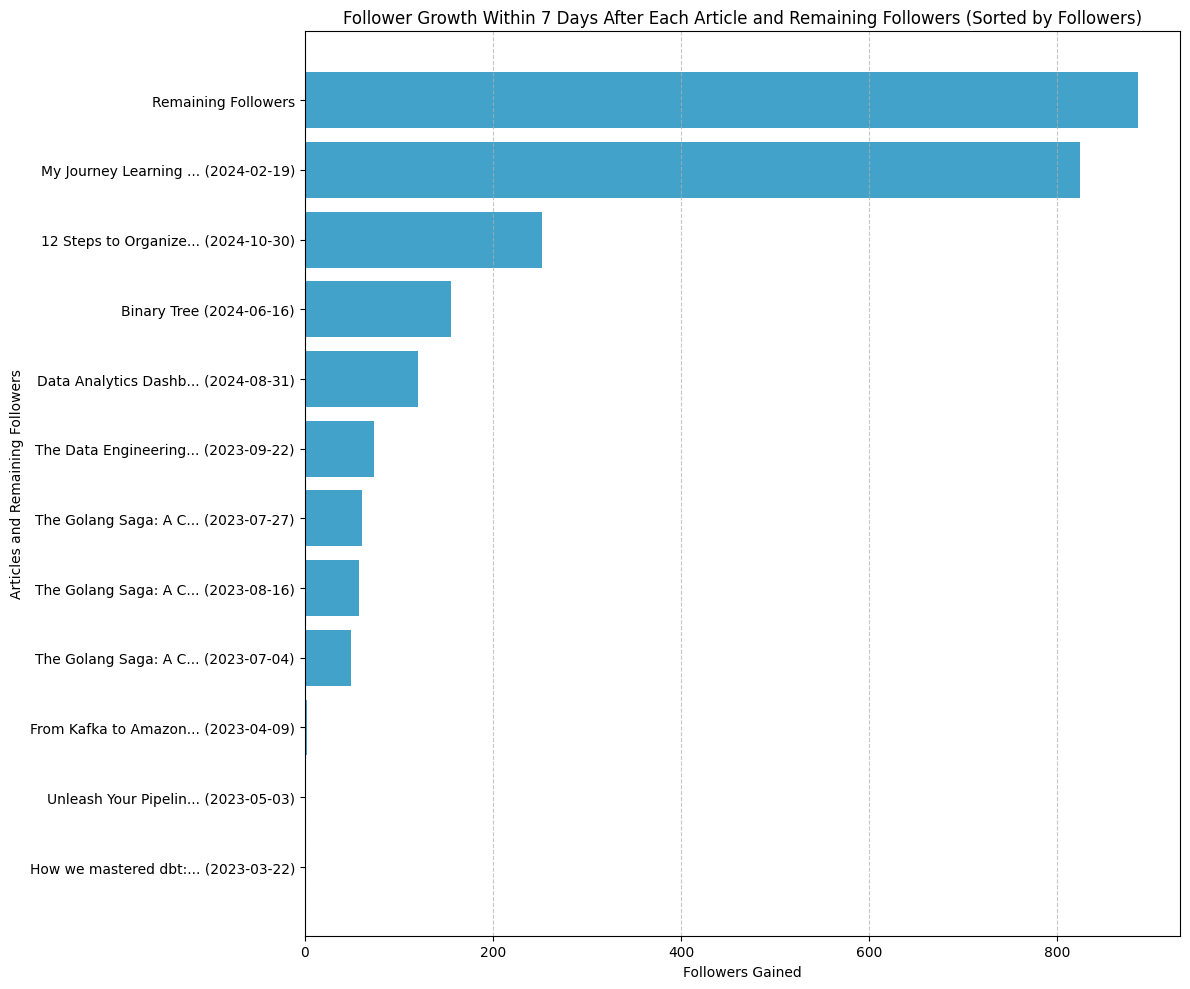

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dates are in datetime format
articles_df['created_at'] = pd.to_datetime(articles_df['created_at'])
extended_scrapped_followers_df['created_at'] = pd.to_datetime(extended_scrapped_followers_df['created_at'])

followers_after_each_article = []
used_follower_dates = pd.Series(dtype='datetime64[ns]')

# Calculate followers within a 7-day window for each article
for article_date in articles_df['created_at']:
    start_date = article_date
    end_date = article_date + pd.Timedelta(days=7)
    
    followers_in_window = extended_scrapped_followers_df[
        (extended_scrapped_followers_df['created_at'] >= start_date) &
        (extended_scrapped_followers_df['created_at'] < end_date)
    ]
    
    followers_after_each_article.append(followers_in_window.shape[0])
    used_follower_dates = (
        used_follower_dates.copy() if followers_in_window['created_at'].empty else
        followers_in_window['created_at'].copy() if used_follower_dates.empty
        else pd.concat([used_follower_dates, followers_in_window['created_at']])
    )

# Count remaining followers
remaining_followers_count = extended_scrapped_followers_df[~extended_scrapped_followers_df['created_at'].isin(used_follower_dates)].shape[0]
followers_after_each_article.append(remaining_followers_count)

# Prepare labels
labels = [
    f"{title[:20]}... ({created_at.strftime('%Y-%m-%d')})" if len(title) > 20 else f"{title} ({created_at.strftime('%Y-%m-%d')})"
    for title, created_at in zip(articles_df['title'], articles_df['created_at'])
] + ["Remaining Followers"]

# Create DataFrame for sorting
data = pd.DataFrame({
    'labels': labels,
    'followers_count': followers_after_each_article
})

# Sort DataFrame by followers_count in descending order
data = data.sort_values(by='followers_count', ascending=False)

# Plot sorted data
plt.figure(figsize=(12, 10))
plt.barh(data['labels'], data['followers_count'], color='#43a2ca')
plt.ylabel("Articles and Remaining Followers")
plt.xlabel("Followers Gained")
plt.title("Follower Growth Within 7 Days After Each Article and Remaining Followers (Sorted by Followers)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to have highest values on top
plt.tight_layout()
plt.show()
